In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [71]:
df = pd.read_csv('/content/german_credit.csv')

In [72]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [73]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

<Axes: xlabel='credit_risk', ylabel='count'>

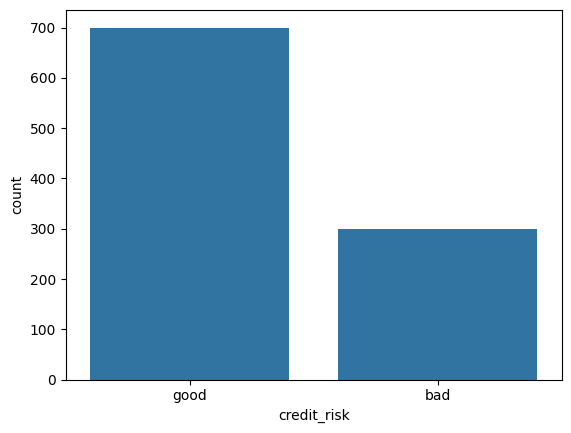

In [74]:
sns.countplot(df,x = 'credit_risk')

<Axes: xlabel='credit_risk', ylabel='count'>

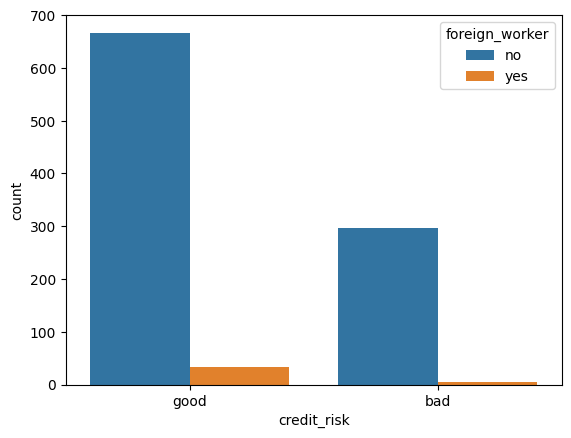

In [75]:
sns.countplot(df,x = 'credit_risk',hue = 'foreign_worker')

<Axes: xlabel='credit_risk', ylabel='count'>

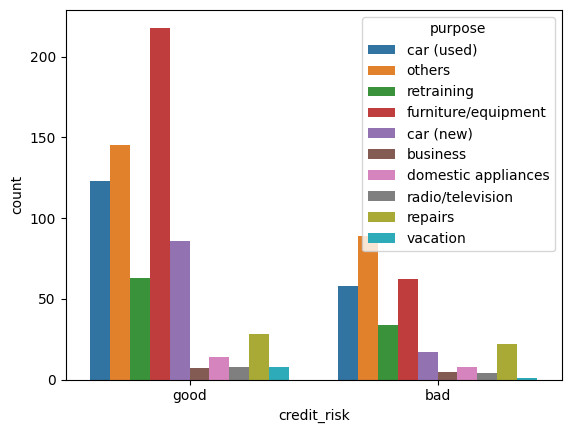

In [76]:
sns.countplot(df,x = 'credit_risk',hue = 'purpose')

<Axes: xlabel='amount', ylabel='Count'>

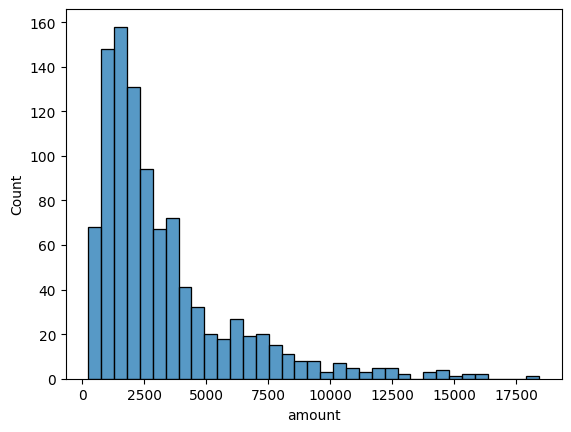

In [77]:
sns.histplot(df,x='amount')

<Axes: xlabel='amount', ylabel='Count'>

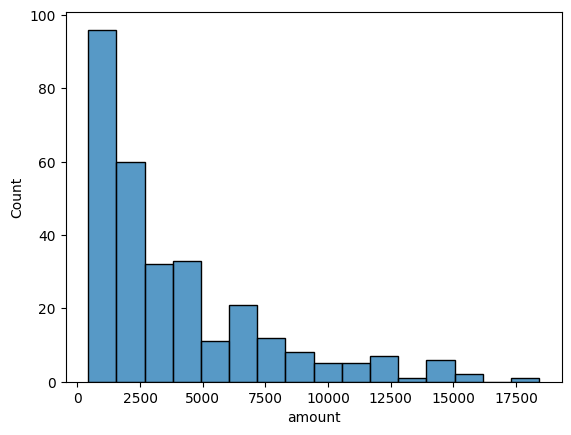

In [78]:
sns.histplot(df[df['credit_risk']=='bad'],x='amount')

<Axes: xlabel='amount'>

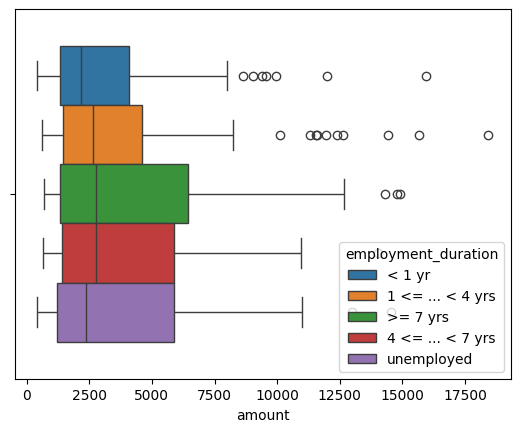

In [79]:
sns.boxplot(df[df['credit_risk']=='bad'],x='amount',hue='employment_duration')

<Axes: xlabel='amount'>

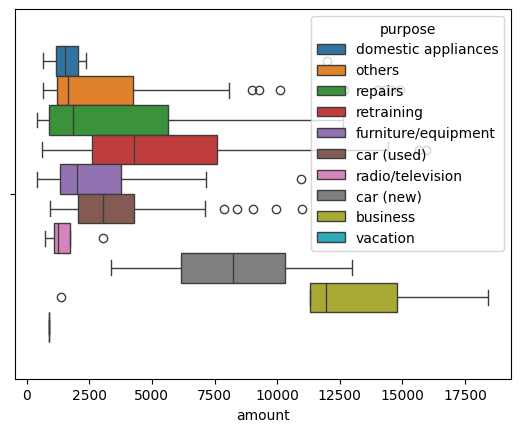

In [80]:
sns.boxplot(df[df['credit_risk']=='bad'],x='amount',hue='purpose')

<Axes: xlabel='age', ylabel='Count'>

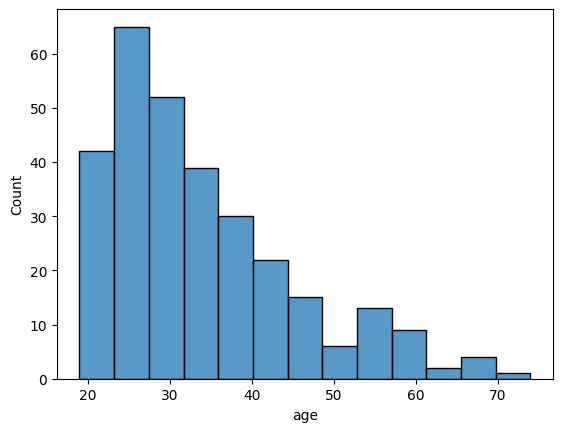

In [81]:
sns.histplot(df[df['credit_risk']=='bad'],x='age')

<Axes: xlabel='number_credits', ylabel='Count'>

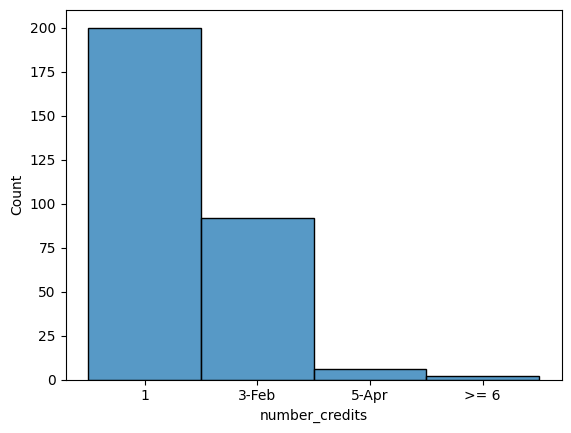

In [82]:
sns.histplot(df[df['credit_risk']=='bad'],x='number_credits')

In [83]:
label = LabelEncoder()

for i in df.columns:
  if df[i].dtypes == 'O':
    df[i] = label.fit_transform(df[i])

In [84]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
import numpy as np

In [85]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,0,2,1049,4,2,2,0,2,...,1,21,1,0,0,1,0,0,0,1
1,3,9,0,5,2799,4,0,1,3,2,...,3,36,1,0,1,1,1,0,0,1
2,0,12,4,8,841,0,1,1,0,2,...,3,23,1,0,0,3,0,0,0,1
3,3,12,0,5,2122,4,0,0,3,2,...,3,39,1,0,1,3,1,0,1,1
4,3,12,0,5,2171,4,0,2,3,2,...,1,38,0,2,1,3,0,0,1,1


In [86]:
df['log_amount'] = round(np.log(df['amount']),2)
df['log_age'] =  round(np.log(df['age']),2)
df['log_duration'] =  round(np.log(df['duration']),2)

df.drop(['amount','age','duration'],axis=1,inplace=True)

In [87]:
df.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
0,3,0,2,4,2,2,0,2,3,1,...,0,0,1,0,0,0,1,6.96,3.04,2.89
1,3,0,5,4,0,1,3,2,0,3,...,0,1,1,1,0,0,1,7.94,3.58,2.20
2,0,4,8,0,1,1,0,2,3,3,...,0,0,3,0,0,0,1,6.73,3.14,2.48
3,3,0,5,4,0,0,3,2,0,3,...,0,1,3,1,0,1,1,7.66,3.66,2.48
4,3,0,5,4,0,2,3,2,3,1,...,2,1,3,0,0,1,1,7.68,3.64,2.48


In [137]:
X = df.drop(['credit_risk'],axis=1)
y = df['credit_risk']

In [138]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [142]:
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
def cross_validate(x = X_train, y = y_train, x_t = X_test, y_test = y_test):
  models =[]
  warnings.filterwarnings(action='ignore',message='')
  models.append(('RandomForest', RandomForestClassifier()))
  models.append(('GradientBoosting',GradientBoostingClassifier()))
  models.append(('SVC',SVC()))
  models.append(('SGD',SGDClassifier()))
  models.append(('LogisticRegression',LogisticRegression()))
  models.append(('AdaBoost',AdaBoostClassifier()))
  models.append(('XGboost',XGBClassifier()))
  models.append(('LightGBM',LGBMClassifier()))
  models.append(('DecisionTree',DecisionTreeClassifier()))
  outcomes = pd.DataFrame(columns= ['Model','Accuracy','Precision','Recall'])
  scoring='accuracy'
  for name, model in models:
    print(name)
    #kfold = RepeatedStratifiedKFold(n_splits=10, random_state=0, n_repeats=3)
    #cross_score = cross_val_score(model, x,y, cv = kfold,scoring = scoring)
    model.fit(X_train,y_train)
    y_pred = model.predict(x_t)

    row = pd.DataFrame([{
        'Model' : name,
        'Accuracy': accuracy_score(y_test,y_pred),
        'Precision': precision_score(y_test,y_pred),
        'Recall': recall_score(y_test,y_pred)
        #'Accuracy_mean': cross_score.mean(),
        #'Accuracy_SD': cross_score.std()
    }])

    outcomes = pd.concat([outcomes,row],ignore_index=True)
    #print (f'Model:{name},Mean: {cross_score.mean()},Std Dev: {cross_score.std()}')
  return outcomes

In [143]:
outcomes = cross_validate(X_train,y_train,X_test,y_test)

RandomForest
GradientBoosting
SVC
SGD
LogisticRegression
AdaBoost
XGboost
LightGBM
[LightGBM] [Info] Number of positive: 559, number of negative: 545
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 1104, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506341 -> initscore=0.025364
[LightGBM] [Info] Start training from score 0.025364
DecisionTree


In [144]:
outcomes

,Model,Accuracy,Precision,Recall
0,RandomForest,0.782609,0.818898,0.737589
1,GradientBoosting,0.739130,0.751825,0.730496
2,SVC,0.692029,0.702899,0.687943
3,SGD,0.528986,0.520295,1.000000
4,LogisticRegression,0.681159,0.682759,0.702128
5,AdaBoost,0.717391,0.726619,0.716312
6,XGboost,0.786232,0.820312,0.744681
7,LightGBM,0.789855,0.807407,0.773050
8,DecisionTree,0.688406,0.716535,0.645390
